# inMarket Challenge 1

In this notebook, I will show how I derived my insights for inMarket's Interview Challenge 1. My measure of performance will be the amount of customers a store brings in divided by the total potential customers, which is declared as 'percent_existing_customers' in the pandas dataframe but referred to as 'c-percentage' in my commentary.

In [1]:
# https://inmarket.com/careers/?gh_jid=1018626
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# read in table 1 of excel file
df=pd.read_excel('table1.xlsx')
print df.dtypes
print '\nvalue counts for category'
print df['Chain Category'].value_counts()
df['total_potential_customers']=df['Customers']+df['Non-Customers']
df['percent_existing_customers']=df['Customers']/df['total_potential_customers']
df.head()

Chain             object
Chain Category    object
Non-Customers      int64
Customers          int64
dtype: object

value counts for category
Eating Places                            194
Grocery Stores                            45
Department Stores                         11
Drug Stores and Proprietary Stores        10
Hardware Stores                            7
Drinking Places (alcoholic Beverages)      1
Name: Chain Category, dtype: int64


,Chain,Chain Category,Non-Customers,Customers,total_potential_customers,percent_existing_customers
0,SUBWAY,Eating Places,5131,5000,10131,0.493535
1,CVS,Drug Stores and Proprietary Stores,4817,4302,9119,0.471762
2,Starbucks US,Eating Places,4817,4128,8945,0.461487
3,McDonald's,Eating Places,3875,3895,7770,0.501287
4,Walgreens,Drug Stores and Proprietary Stores,3456,3140,6596,0.476046


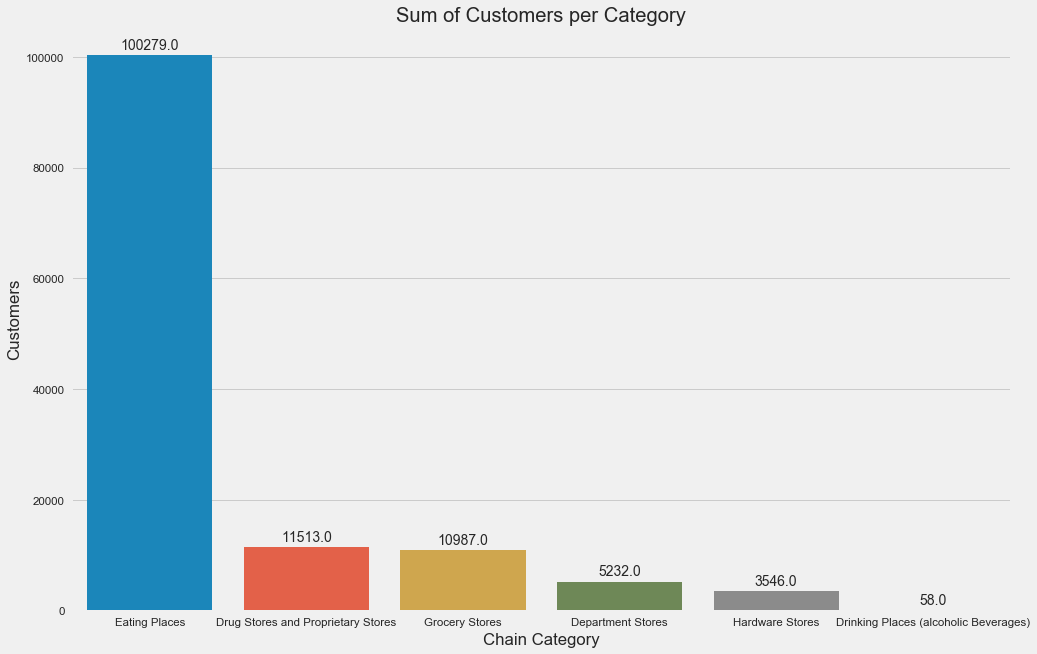

In [3]:
sns.set(font_scale=1.15)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.title('Sum of Customers per Category')
ax=sns.barplot(x=df.groupby(['Chain Category'])['Customers'].sum().sort_values(ascending=False).index,\
               y=df.groupby(['Chain Category'])['Customers'].sum().sort_values(ascending=False))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


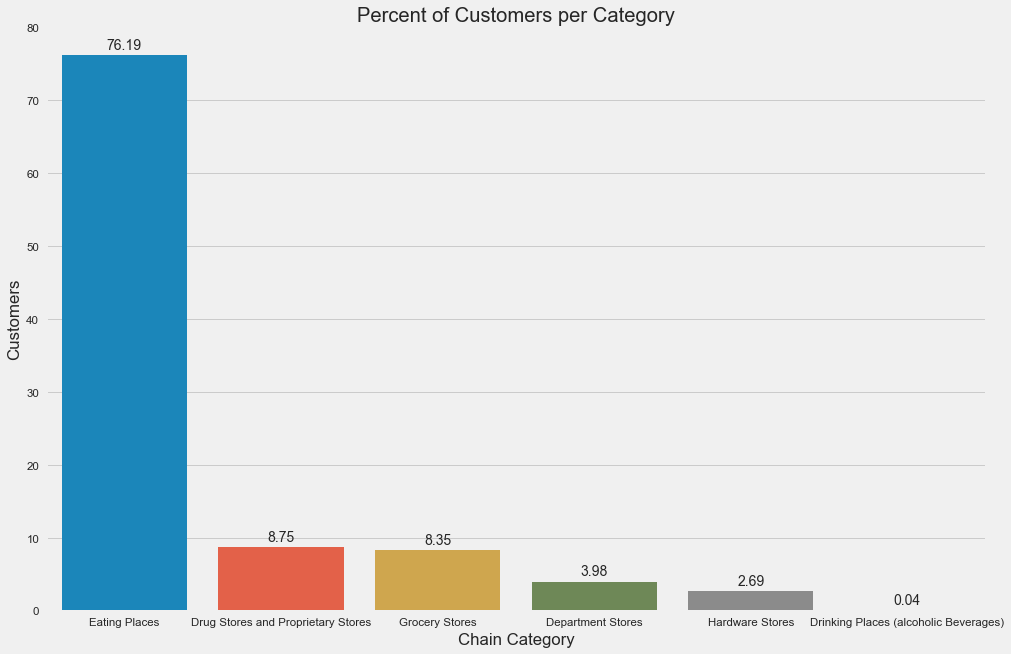

In [4]:
plt.figure(figsize=(15,10))
plt.title('Percent of Customers per Category')
percent_df=df.groupby(['Chain Category'])['Customers'].sum().sort_values(ascending=False)/df['Customers'].sum() * 100.0
ax=sns.barplot(x=percent_df.index,y=percent_df)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [5]:
print 'customers'
print df.groupby(['Chain Category'])['Customers'].sum()
print'\nnon-customers'
print df.groupby(['Chain Category'])['Non-Customers'].sum()
print '\nratio customers to non-customers'
print df.groupby(['Chain Category'])['Customers'].sum()/df.groupby(['Chain Category'])['Non-Customers'].sum()

customers
Chain Category
Department Stores                          5232
Drinking Places (alcoholic Beverages)        58
Drug Stores and Proprietary Stores        11513
Eating Places                            100279
Grocery Stores                            10987
Hardware Stores                            3546
Name: Customers, dtype: int64

non-customers
Chain Category
Department Stores                         6388
Drinking Places (alcoholic Beverages)      105
Drug Stores and Proprietary Stores       11205
Eating Places                            94670
Grocery Stores                           10476
Hardware Stores                           3770
Name: Non-Customers, dtype: int64

ratio customers to non-customers
Chain Category
Department Stores                        0.819036
Drinking Places (alcoholic Beverages)    0.552381
Drug Stores and Proprietary Stores       1.027488
Eating Places                            1.059248
Grocery Stores                           1.048778
Hardware Sto

Chain Category
Eating Places                            0.514386
Grocery Stores                           0.511904
Drug Stores and Proprietary Stores       0.506779
Hardware Stores                          0.484691
Department Stores                        0.450258
Drinking Places (alcoholic Beverages)    0.355828
dtype: float64


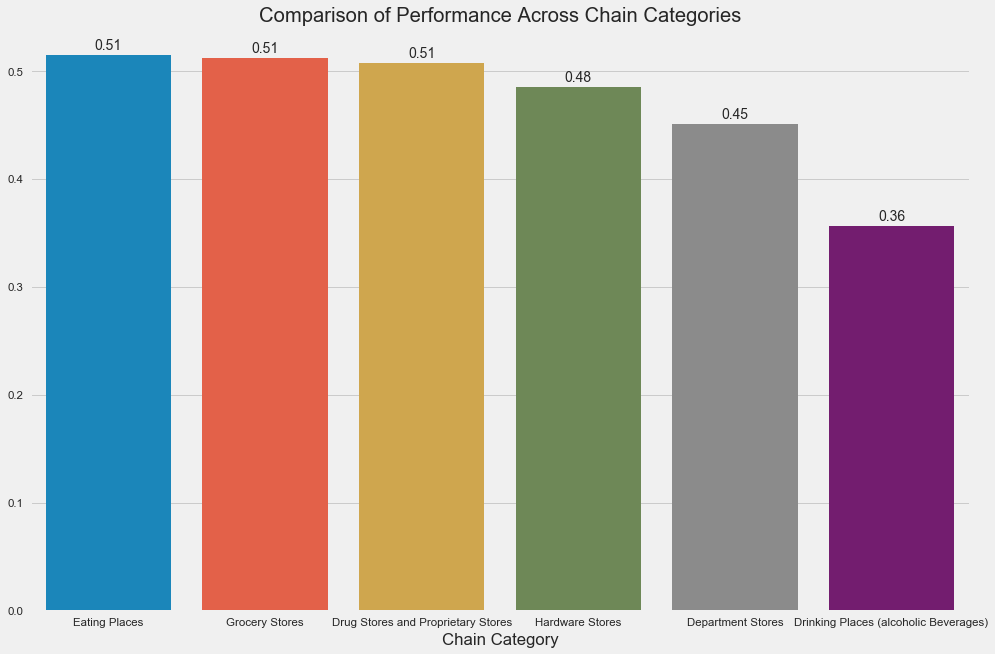

In [60]:
plt.figure(figsize=(15,10))
plt.title('Comparison of Performance Across Chain Categories')

percent_df=df.groupby(['Chain Category'])['Customers'].sum()/df.groupby(['Chain Category'])['total_potential_customers'].sum()
percent_df.sort_values(ascending=False,inplace=True)
ax=sns.barplot(x=percent_df.index,y=percent_df )

print percent_df
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


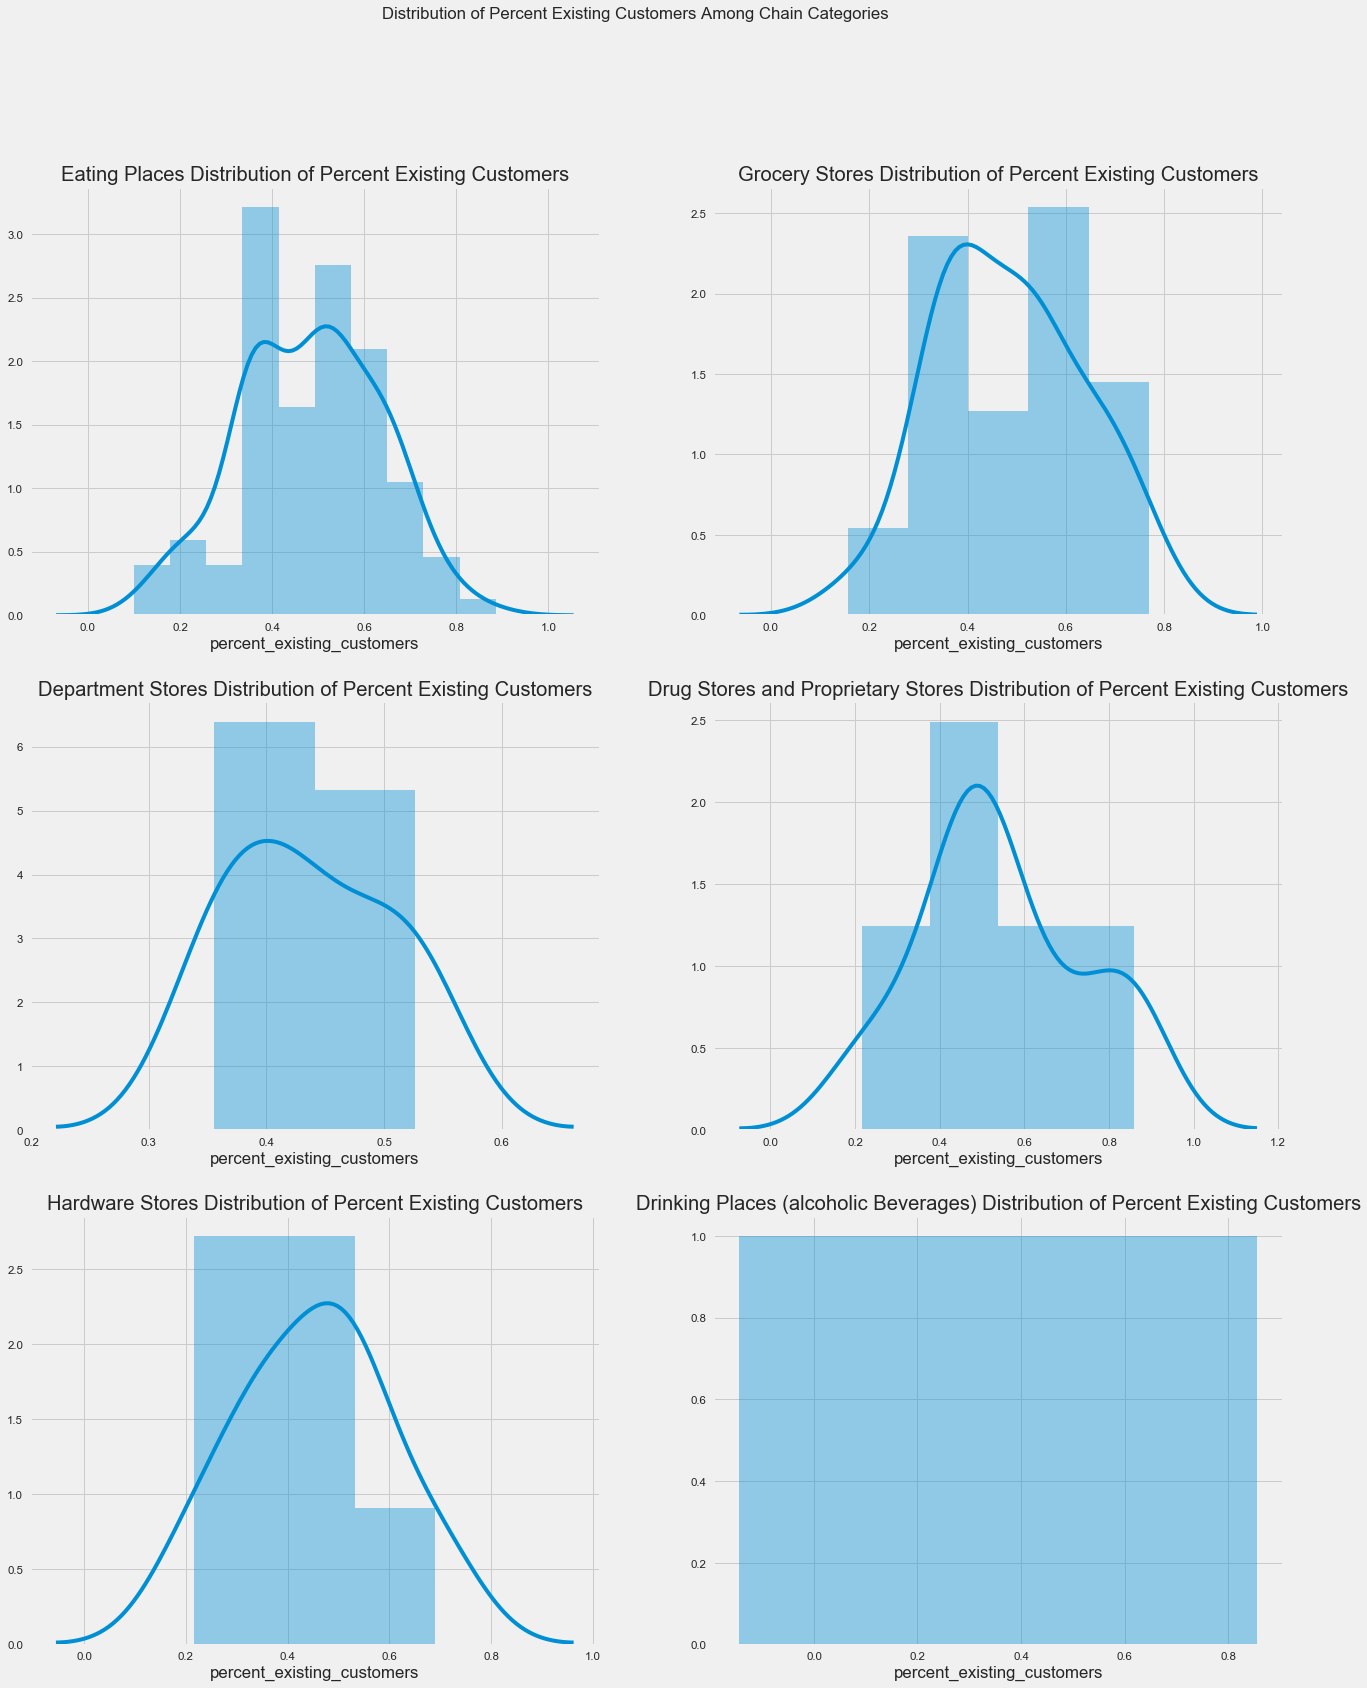

In [61]:
plt.figure(figsize=(20,25))

chain_list=df['Chain Category'].value_counts().index.tolist()
plt.suptitle('Distribution of Percent Existing Customers Among Chain Categories')
for i in chain_list:
    plt.subplot(3,2,chain_list.index(i)+1)
    plt.title(i+' Distribution of Percent Existing Customers')
    sns.distplot(df[df['Chain Category']==i]['percent_existing_customers'])

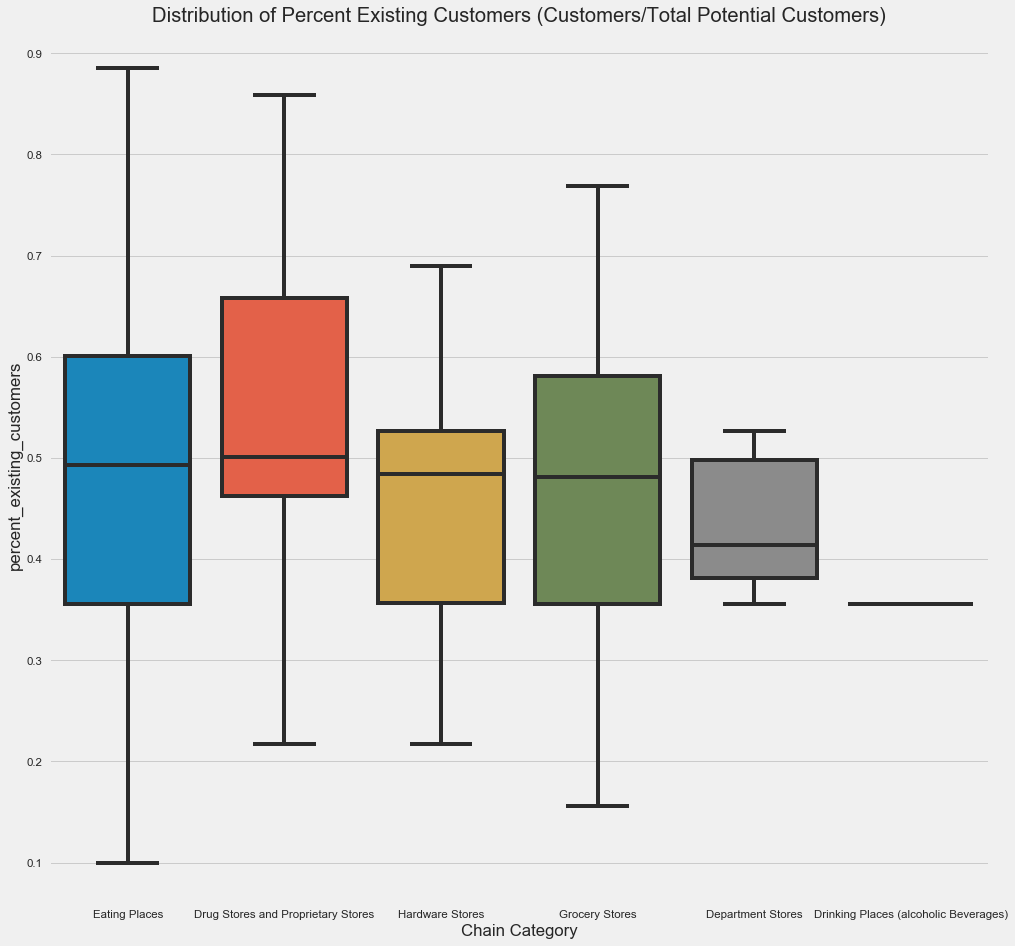

In [47]:
plt.figure(figsize=(15,15))
plt.title('Distribution of Percent Existing Customers (Customers/Total Potential Customers)')
sns.boxplot(data=df,x='Chain Category',y='percent_existing_customers')

Chain Category
Drug Stores and Proprietary Stores       0.545155
Grocery Stores                           0.484359
Eating Places                            0.481689
Hardware Stores                          0.450851
Department Stores                        0.436390
Drinking Places (alcoholic Beverages)    0.355828
Name: percent_existing_customers, dtype: float64


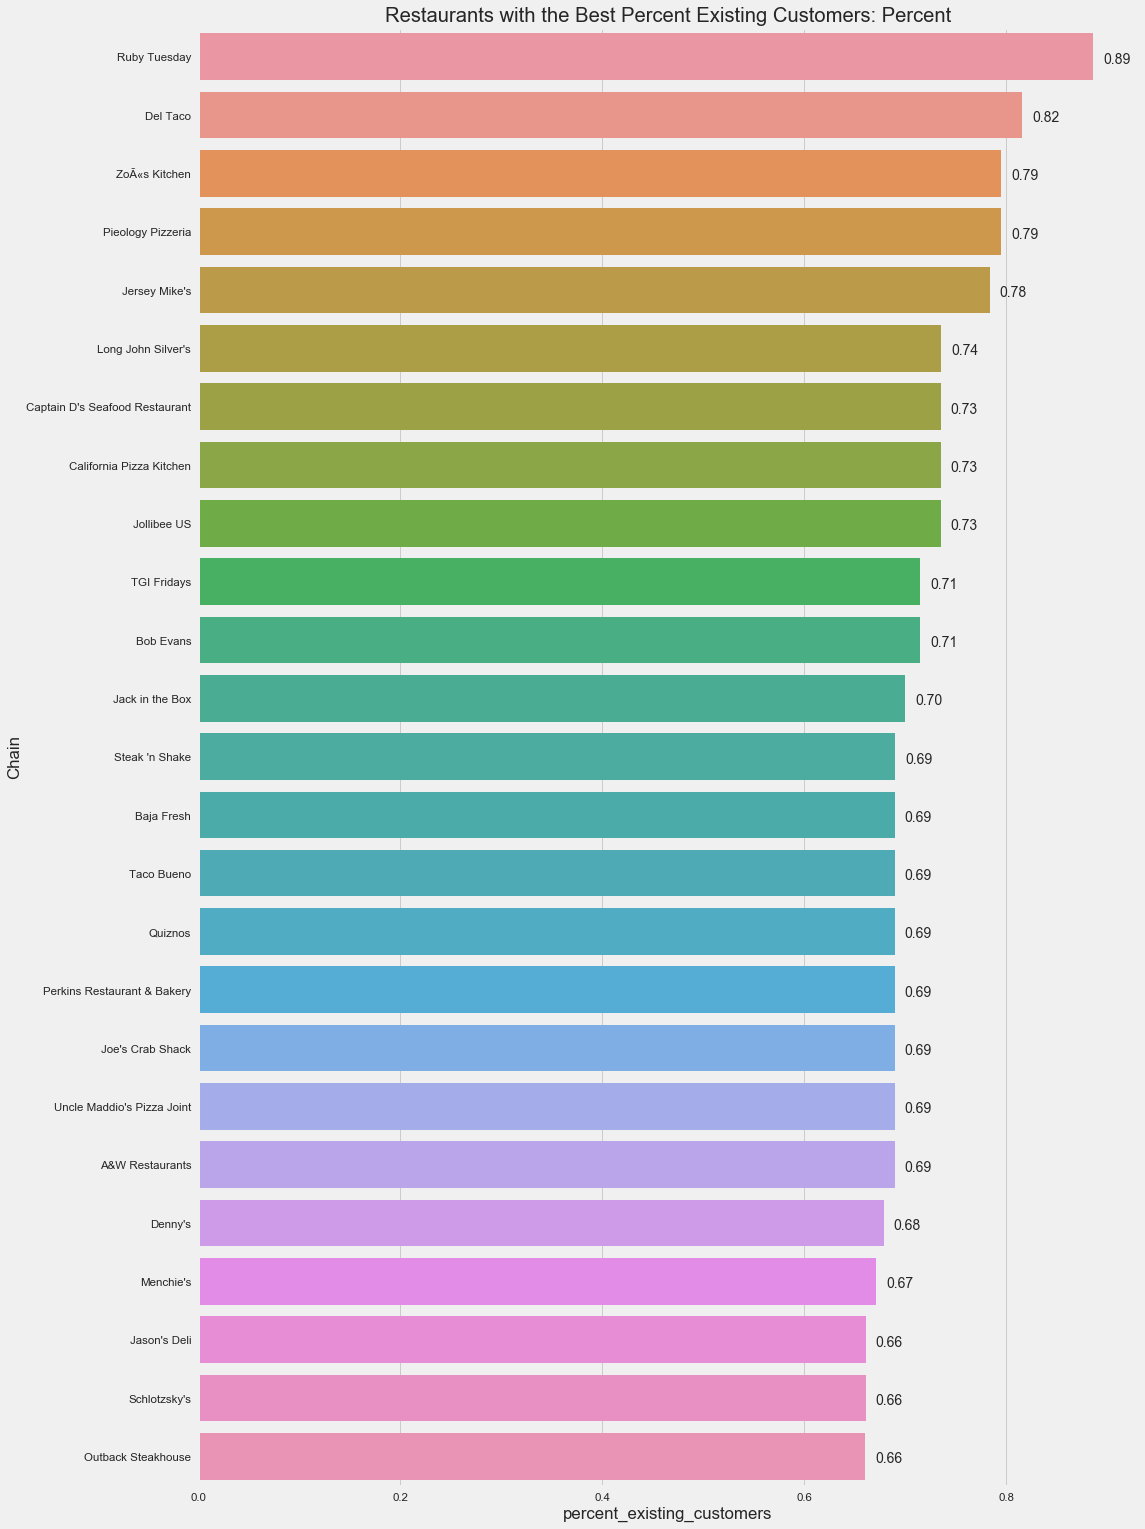

In [9]:
print df.groupby(['Chain Category'])['percent_existing_customers'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,25))
plt.title('Restaurants with the Best Percent Existing Customers: Percent')
ax=sns.barplot(data=df[df['Chain Category']=='Eating Places'].sort_values(by=['percent_existing_customers'],ascending=False).head(25),y='Chain',x='percent_existing_customers',orient='h')

for p in ax.patches:
    width = p.get_width()
    plt.text(0.01+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center') 
plt.show()

Chain Category
Drug Stores and Proprietary Stores       0.545155
Grocery Stores                           0.484359
Eating Places                            0.481689
Hardware Stores                          0.450851
Department Stores                        0.436390
Drinking Places (alcoholic Beverages)    0.355828
Name: percent_existing_customers, dtype: float64


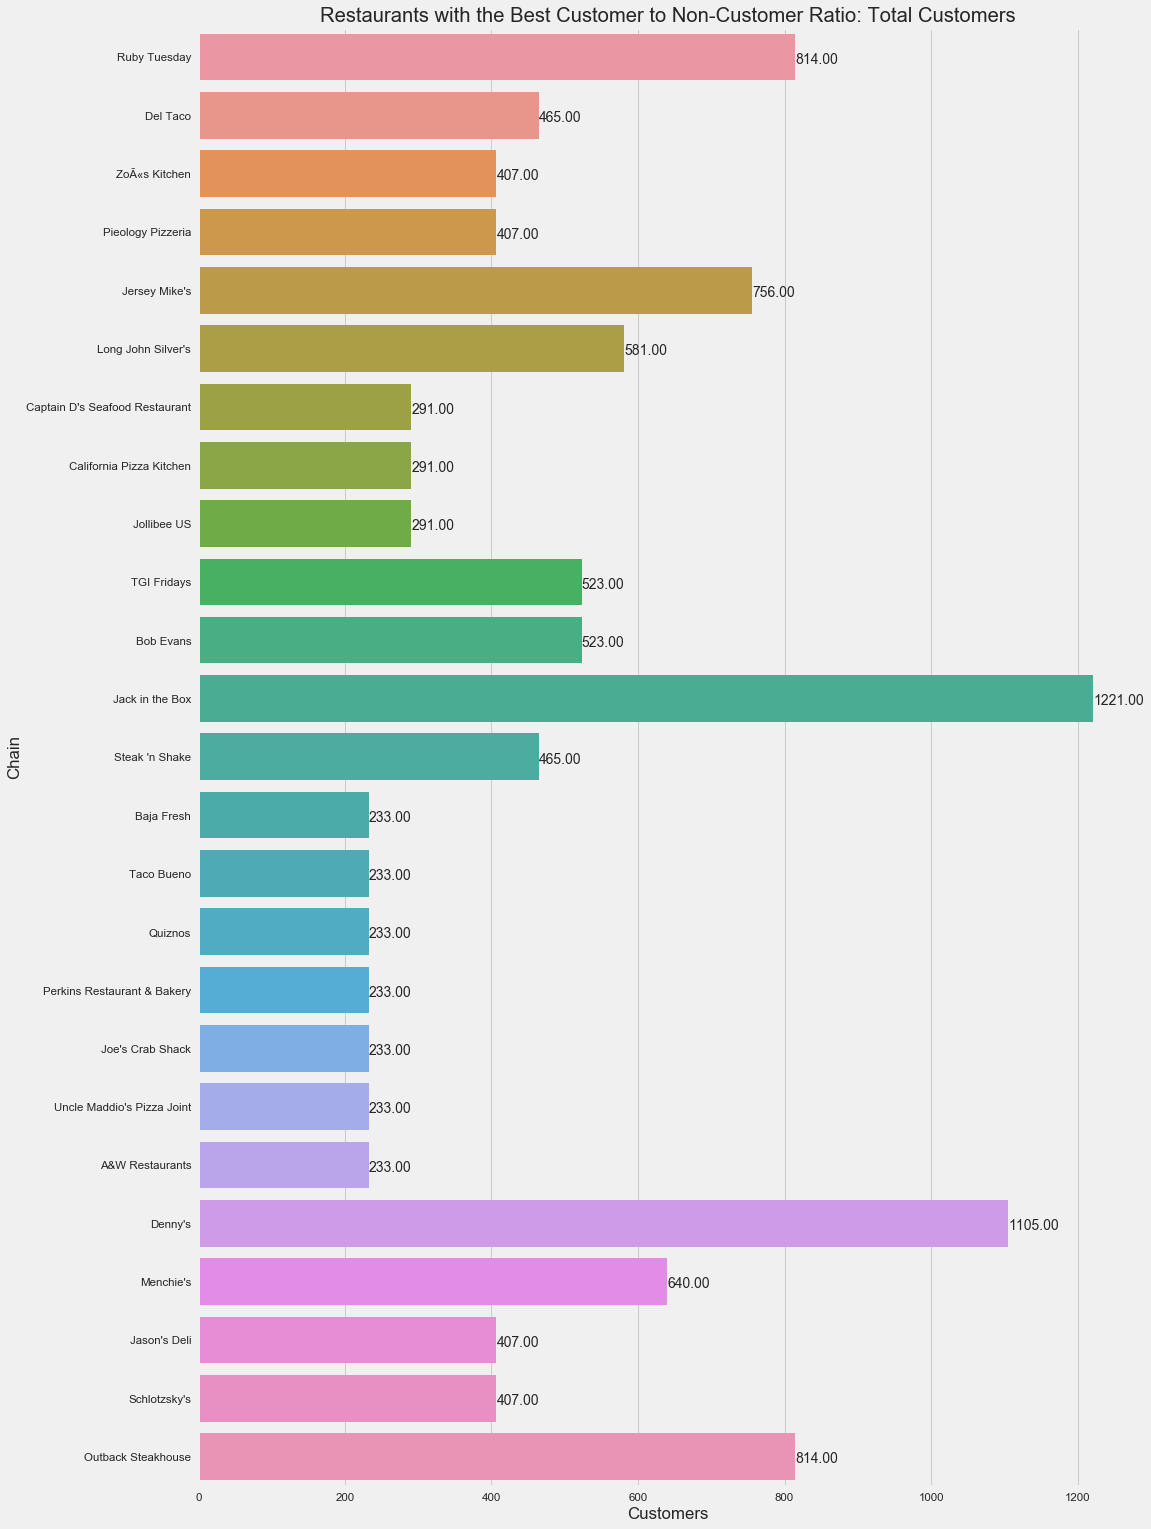

In [10]:
print df.groupby(['Chain Category'])['percent_existing_customers'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,25))
plt.title('Restaurants with the Best Customer to Non-Customer Ratio: Total Customers')
ax=sns.barplot(data=df[df['Chain Category']=='Eating Places'].sort_values(by=['percent_existing_customers'],ascending=False).head(25),y='Chain',x='Customers',orient='h')
for p in ax.patches:
    width = p.get_width()
    plt.text(.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center') 
plt.show()

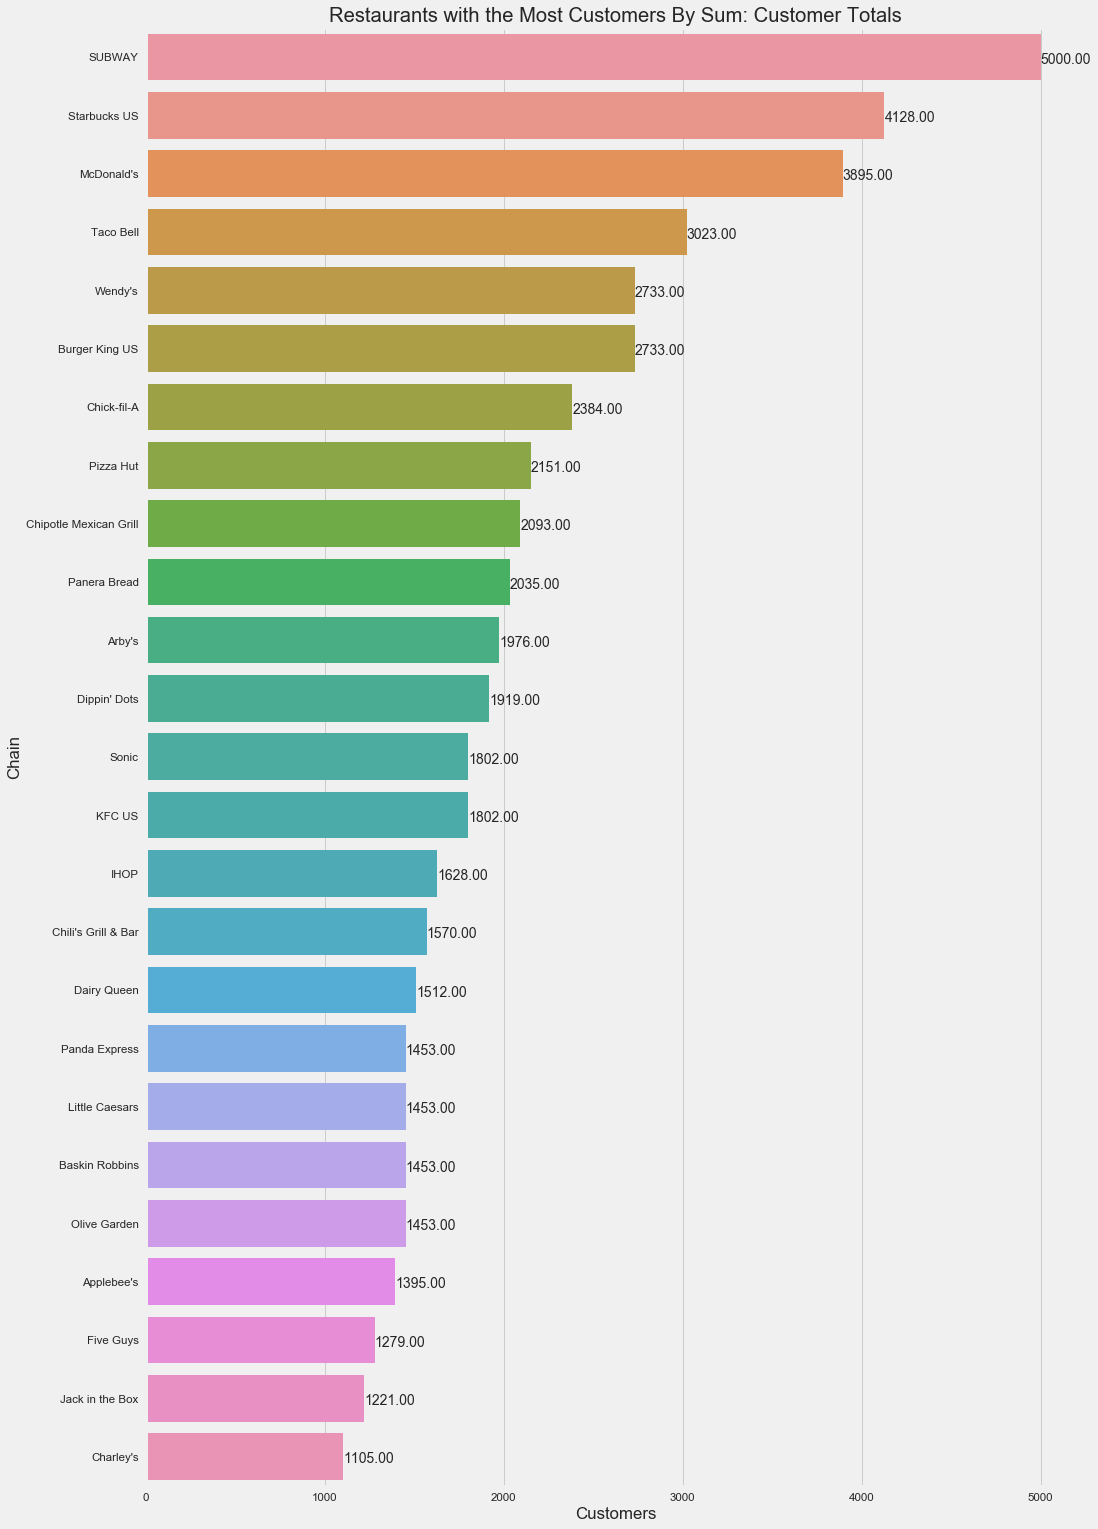

In [62]:
plt.figure(figsize=(15,25))
plt.title('Restaurants with the Most Customers By Sum: Customer Totals')
ax=sns.barplot(data=df[df['Chain Category']=='Eating Places'].sort_values(by=['Customers'],ascending=False).head(25),y='Chain',x='Customers',orient='h')
for p in ax.patches:
    width = p.get_width()
    plt.text(.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center') 
plt.show()

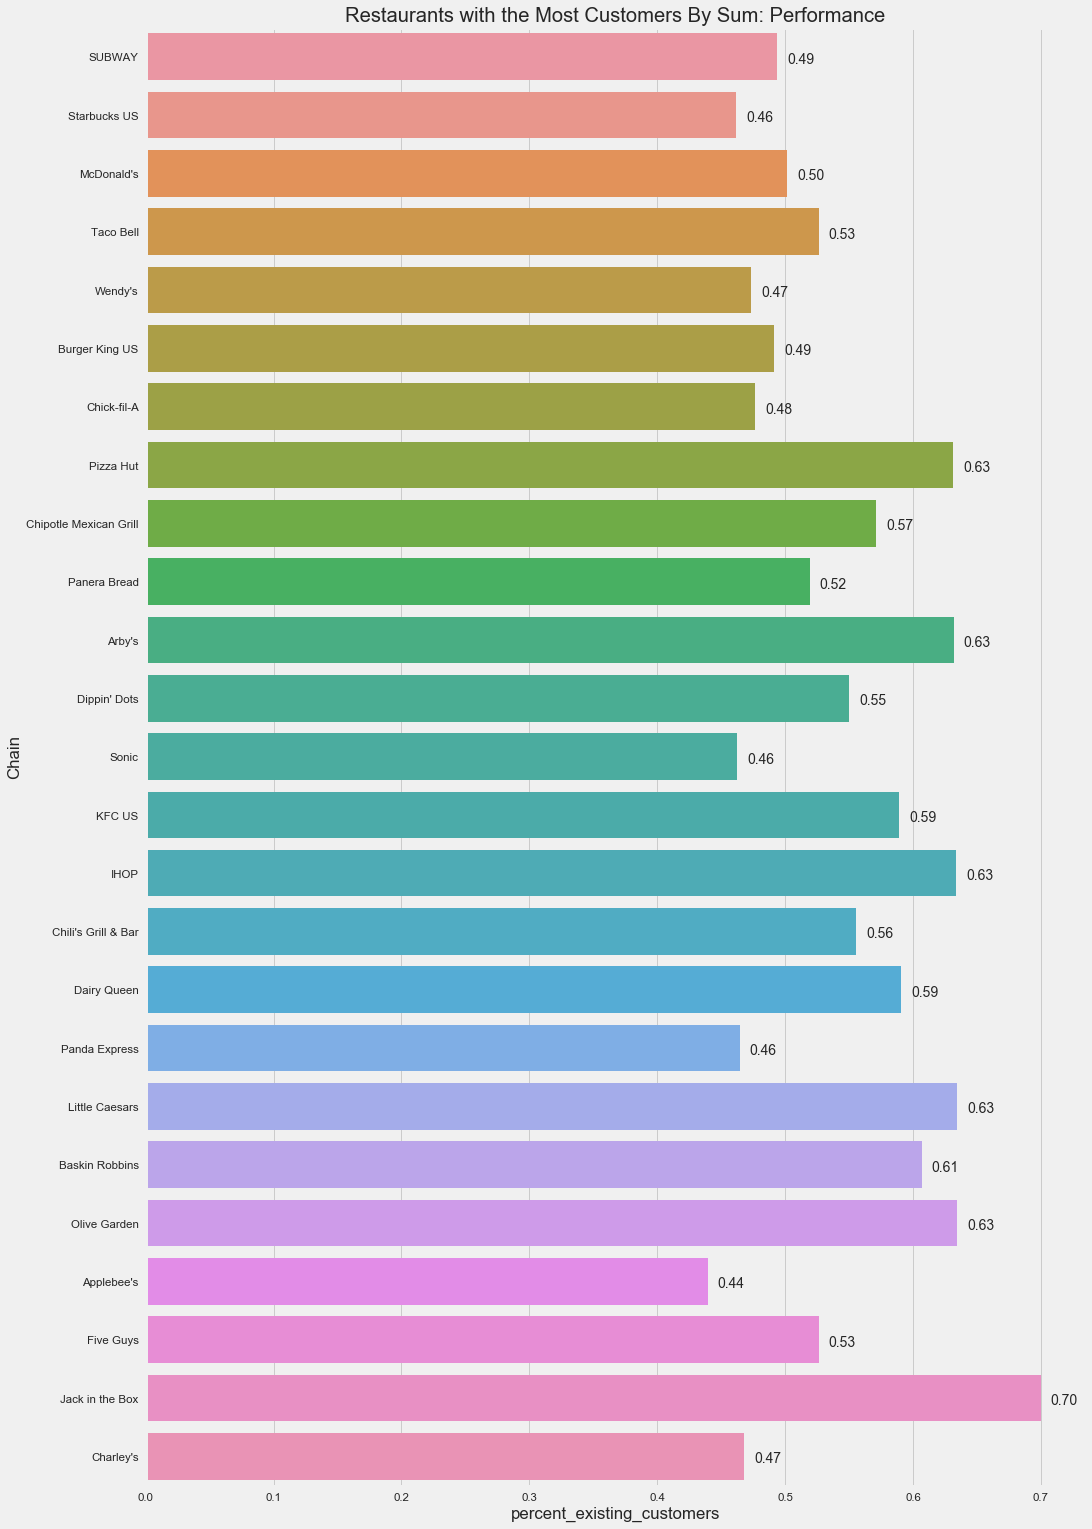

In [63]:
plt.figure(figsize=(15,25))
plt.title('Restaurants with the Most Customers By Sum: Performance')
ax=sns.barplot(data=df[df['Chain Category']=='Eating Places'].sort_values(by=['Customers'],ascending=False).head(25),y='Chain',x='percent_existing_customers',orient='h')
for p in ax.patches:
    width = p.get_width()
    plt.text(0.008+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center') 
plt.show()

In [51]:
# if the top 25 eateries had the same percent_existing_customers as jack in the box
top_fast_food=df[df['Chain Category']=='Eating Places'].sort_values(by=['Customers'],ascending=False).head(25)
top_fast_food['if_jack_growth']=(top_fast_food.loc[top_fast_food.Chain=='Jack in the Box','percent_existing_customers'].tolist()[0]-\
                                 top_fast_food['percent_existing_customers'])*top_fast_food['total_potential_customers']
print 'if fast foods performed as well as jack in the box, customer growth:'
print top_fast_food['if_jack_growth'].sum() / df['Customers'].sum()
print '\nnew customers if top 25 eateries performed as well as jack:'
print top_fast_food['if_jack_growth'].sum()

if fast foods performed as well as jack in the box, customer growth:
0.134177597745

new customers if top 25 eateries performed as well as jack:
17659.7845272


In [49]:
# why department stores are underperforming
df[df['Chain Category']=='Department Stores'].describe()

,Non-Customers,Customers,total_potential_customers,percent_existing_customers
count,11.000000,11.000000,11.000000,11.000000
mean,580.727273,475.636364,1056.363636,0.436390
std,464.302292,380.306527,833.597897,0.068453
min,105.000000,58.000000,163.000000,0.355828
25%,157.000000,116.000000,273.000000,0.381430
50%,419.000000,465.000000,884.000000,0.414039
75%,994.500000,843.000000,1942.500000,0.497529
max,1361.000000,1047.000000,2291.000000,0.526395


group1,group2,meandiff,lower,upper,reject
Department Stores,Drinking Places (alcoholic Beverages),-0.0806,-0.5351,0.374,False
Department Stores,Drug Stores and Proprietary Stores,0.1088,-0.0814,0.2989,False
Department Stores,Eating Places,0.0453,-0.0896,0.1802,False
Department Stores,Grocery Stores,0.048,-0.0984,0.1943,False
Department Stores,Hardware Stores,0.0145,-0.1959,0.2249,False
Drinking Places (alcoholic Beverages),Drug Stores and Proprietary Stores,0.1893,-0.2671,0.6457,False
Drinking Places (alcoholic Beverages),Eating Places,0.1259,-0.3104,0.5621,False
Drinking Places (alcoholic Beverages),Grocery Stores,0.1285,-0.3114,0.5685,False
Drinking Places (alcoholic Beverages),Hardware Stores,0.095,-0.3702,0.5602,False
Drug Stores and Proprietary Stores,Eating Places,-0.0635,-0.2046,0.0776,False


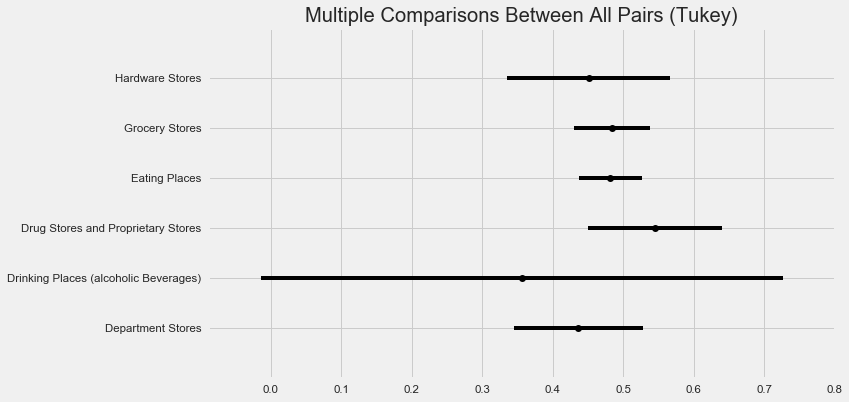

In [50]:
tukey = pairwise_tukeyhsd(endog=df['percent_existing_customers'].tolist(),     # Data
                          groups=df['Chain Category'].tolist(),   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

In [58]:
# why department stores are underperforming
df[df['Chain Category']=='Drug Stores and Proprietary Stores'].describe()

,Non-Customers,Customers,total_potential_customers,percent_existing_customers
count,10.000000,10.000000,10.000000,10.000000
mean,1120.500000,1151.300000,2271.800000,0.545155
std,1699.368527,1458.460455,3141.182254,0.201171
min,105.000000,58.000000,163.000000,0.217228
25%,105.000000,145.250000,284.750000,0.462412
50%,209.000000,523.500000,733.000000,0.500466
75%,1413.500000,1395.750000,2783.000000,0.658135
max,4817.000000,4302.000000,9119.000000,0.859060


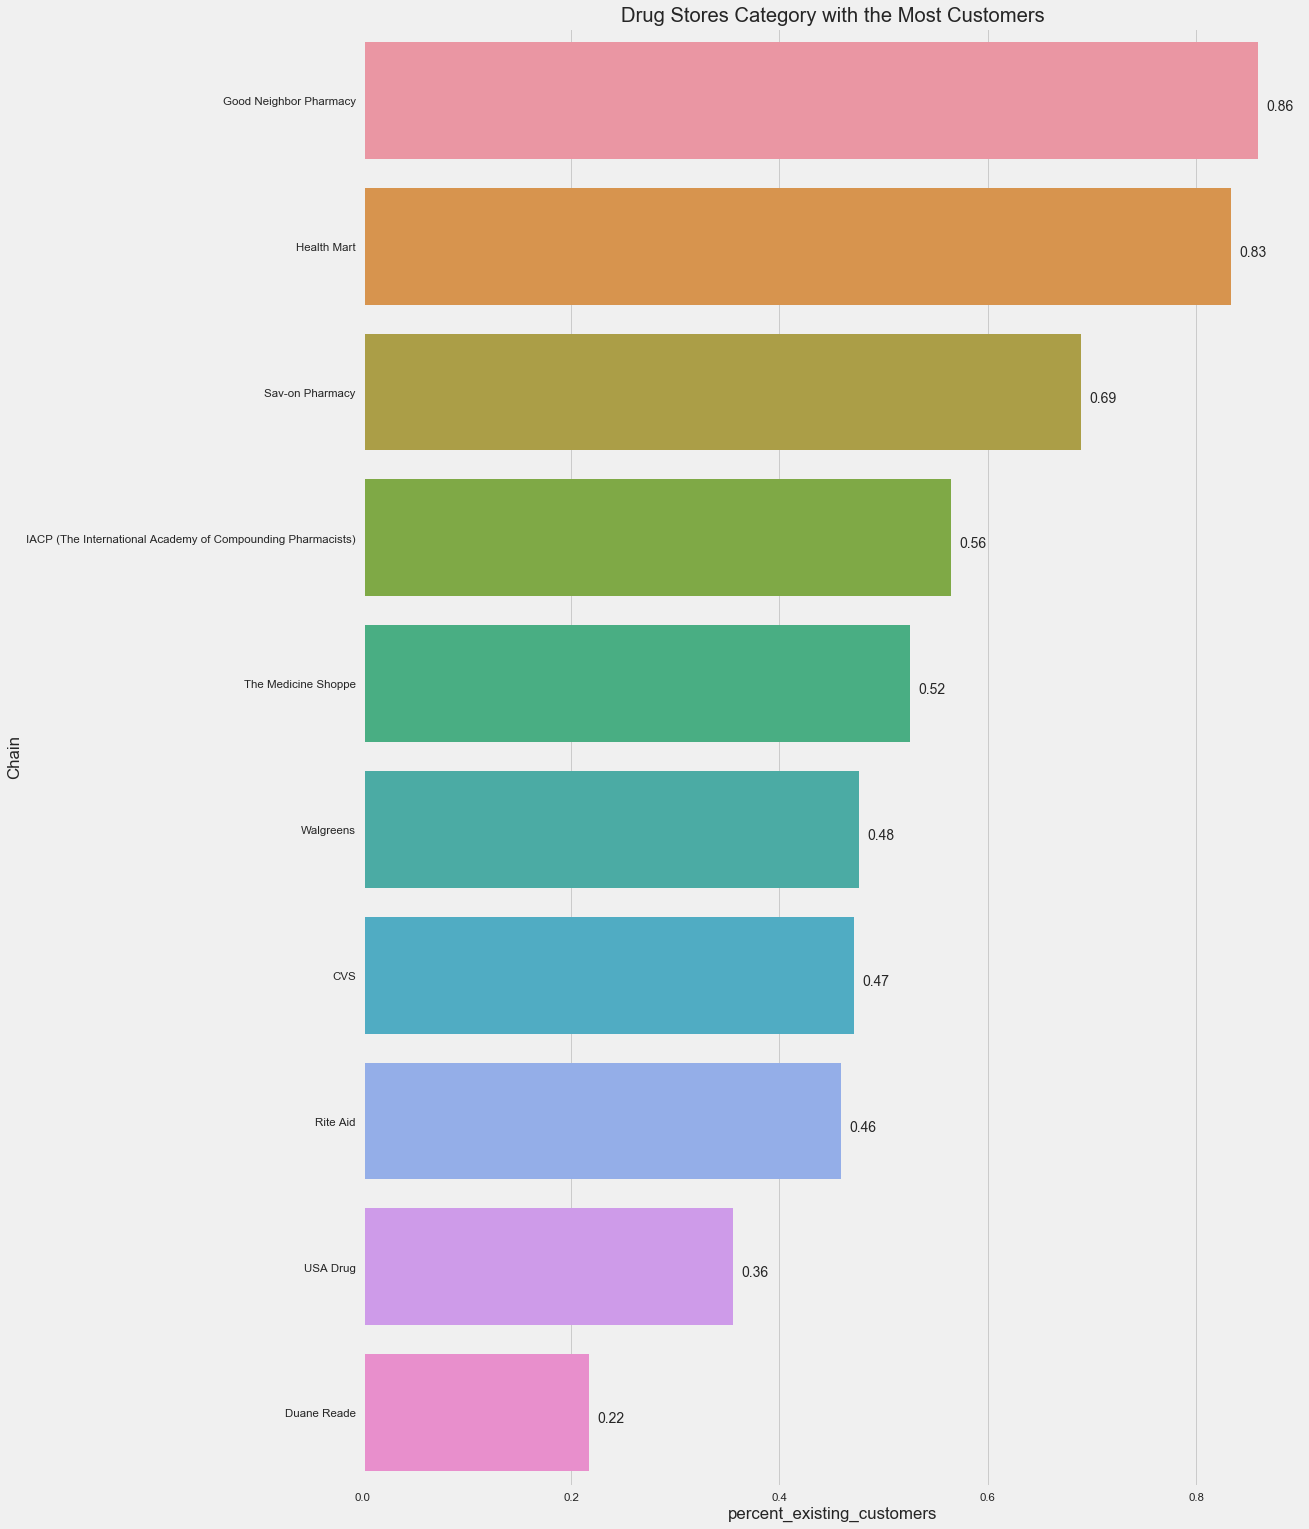

In [59]:
plt.figure(figsize=(15,25))
plt.title('Drug Stores Category with the Most Customers')
ax=sns.barplot(data=df[df['Chain Category']=='Drug Stores and Proprietary Stores'].sort_values(by=['percent_existing_customers'],ascending=False),y='Chain',x='percent_existing_customers',orient='h')
for p in ax.patches:
    width = p.get_width()
    plt.text(0.008+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center') 
plt.show()

## Insight 1: Tapping into Fast Food
Among all the categories, eating places represents 76.2% of the customer base and also has the best percentage of customers out of total potential customers (customers + non-customers) at 51.4%. I will be referring to this percentage as c-percentage from now on. Within these individual eateries, fast food/convenience establishments (Subway, Starbucks, McDonald’s, and Taco Bell to name a few) lead with the most total customers (these examples given run from 3000 to 5000 customers). However, many of these leading fast food/convenience establishments have very average c-percentages (50% give or take 3%), while the best eateries have c-percentages from 75% to 89%. Among fast foods, however, Jack in the Box has the best balance between total customers (1221) and c-percentage (70%). 
Therefore, it could definitely benefit Brawndo to look into what factors are contributing to Jack in the Box’s success, because if the top 25 eateries (most of which are fast food/convenience restaurants) performed as well as Jack, these places would bring in 17,659 new customers: an equivalent of 13.4% growth in customer base.


## Insight 2: A Look at Underperforming Department Stores

With the exception of Drinking Places (excluded because there is only one Drinking Place that serves Brawndo), Department Stores represent the category whose distribution of c-percentage is the worst. Not only does it have the lowest mean c-percentage, but the 25% of the values of the c-percentage fall under 38.1% and 75% of the values fall under 49.7%, which can be viewed in boxplot, titled ‘Distribution of Percent Existing Customers (Customers/Total Potential Customers)’ of the linked notebook. Hardware stores are also in a similar situation; but because of its greater variance of c-percentage, it is difficult to make any assumptions about the category without a greater sample size (more stores). I ran a Tukey Test (a post-hoc extension of the ANOVA test), which returned that there is no statistically significant difference in the means of c-percentage between any two Chain categories—probably because there aren’t enough stores to make a statistically significant judgment. Nevertheless, the tightness of the distribution of c-percentage of Department Stores, skewed toward low-performance, is enough to heed a warning that seeking future prospects in this category may not be the best idea.


## Insight 3: Drug Stores and Proprietary Stores Shows Promise
Eating Places may have the largest percentage of customers, but that’s no reason to overlook the potential in another category: Drug Stores and Proprietary Stores. Though there are only 11 establishments open in this category, it’s performance distribution is skewed toward the higher side with 75% of establishments sitting at 65.8% c-percentage. Like the remarks regarding the performance of Department Stores, the sample size is too small to pass a statistically sound conclusion. However, the fact that as of now this category has the best 25/50/75 percentile out of all categories should lend some consideration into developing more opportunities in Drug and Proprietary Stores.
